# Data Preprocessing

## Load and inspect data

In [430]:
import pandas as pd
import numpy as np

#open csv
filepath = r'..\Database\TBIMSPublic.2024-11-01\Data\Form1.csv'

df = pd.read_csv(filepath)

C:\Users\benol\AppData\Local\Temp\ipykernel_35040\1143435178.py:7: DtypeWarning: Columns (17,18,19,291) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [431]:
#inspect
df.info()
print(df.notnull().sum())
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19560 entries, 0 to 19559
Columns: 371 entries, Mod1Id to YoungestAgeTBI
dtypes: float64(317), int64(50), object(4)
memory usage: 55.4+ MB
Mod1Id                   19560
SexF                     19549
Height                   19546
Weight                   19540
AcutePay1                19520
                         ...  
TBI_IDAsked              15645
TFCDays                  19560
WordRecallCorrect_i_n     1667
YoungestAgeLOC            2369
YoungestAgeTBI            5510
Length: 371, dtype: int64


,Mod1Id,SexF,Height,Weight,AcutePay1,AcutePay2,Cause,SCI,GCSEye,GCSVer,...,PROBLEMUse,PTADays,ReasonCorrect_i_n,RURALadm,RURALdc,TBI_IDAsked,TFCDays,WordRecallCorrect_i_n,YoungestAgeLOC,YoungestAgeTBI
count,19560.000000,19549.000000,19546.000000,19540.000000,19520.000000,19517.000000,19540.000000,19530.000000,19513.000000,19514.000000,...,19560.000000,19560.000000,1620.000000,17118.000000,17114.000000,15645.0,19560.000000,1667.000000,2369.000000,5510.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10695.520808,1.741419,422.961834,4055.100665,15.121209,620.346365,11.124104,0.204659,5.480961,6.739213,...,31.297751,2026.192894,-0.804133,2.019336,2.045694,1.0,350.686120,-1.349788,26.997889,48.998911
std,7357.993333,0.823418,294.448339,3203.492801,103.887298,407.622101,39.010258,3.881594,13.390746,12.379589,...,45.255917,3769.006431,1.010798,0.741708,0.738624,0.0,1736.115513,1.259264,18.249178,149.742841
min,1.000000,1.000000,10.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,-365.000000,-3.022400,1.000000,1.000000,1.0,0.000000,-3.930900,0.000000,0.000000
25%,4911.750000,1.000000,70.000000,184.000000,2.000000,7.000000,1.000000,0.000000,1.000000,4.000000,...,0.000000,9.000000,-1.550600,1.000000,1.000000,1.0,0.500000,-2.248300,14.000000,12.000000
50%,9821.500000,2.000000,666.000000,6666.000000,4.000000,888.000000,10.000000,0.000000,4.000000,5.000000,...,1.000000,25.000000,-1.121300,2.000000,2.000000,1.0,2.000000,-1.225100,21.000000,19.000000
75%,14718.250000,2.000000,666.000000,6666.000000,4.000000,888.000000,19.000000,0.000000,4.000000,8.000000,...,99.000000,69.000000,-0.167900,3.000000,3.000000,1.0,11.000000,-0.512600,36.000000,38.000000


Lots of missing values as well as what appears to me categorical variables mixed with continuous. Pandas gave us a data type warning so lets inspect those columns first

In [432]:
#inspect mixed columns index
mixed_type_col = [17,18,19,291]

#find column names
mixed_type_col_names =[df.columns[column] for column in mixed_type_col]

print(mixed_type_col_names)

print(df['DeathCause1'].value_counts(dropna=False))

['DeathCause1', 'DeathCause2', 'DeathECode', 'FIMLocoModeD']
DeathCause1
88888.0    18410
88888       1121
NaN           12
427.5          2
44444.0        2
567.9          1
518.81         1
162.9          1
785.52         1
486.0          1
852.2          1
415.19         1
428.0          1
436            1
995.86         1
496.0          1
X23            1
44444          1
Name: count, dtype: int64


a little searching shows that these codes belong to ICD-10-CM Codes as well as some included with the dataset in ```..\Code\Form1_Codes```. ```..\Code\Form1_Variables.csv``` will give us some more information.

In [433]:
form_vars_filepath = r'..\Database\TBIMSPublic.2024-11-01\Code\Form1_Variables.csv'
form_vars_df = pd.read_csv(form_vars_filepath)

form_vars_df[form_vars_df['Name'].isin(mixed_type_col_names)]

,VariableId,Name,Question,MaxRealValueLength
17,537.0,DeathCause1,Primary cause of death ICD diagnosis code:,6.0
18,538.0,DeathCause2,Secondary cause of death ICD diagnosis code:,4.0
19,539.0,DeathECode,External cause of death ICD code:,4.0
291,671.0,FIMLocoModeD,Walking/Wheelchair mode:,1.0


Unfortunately this does not explicitly tell us what variable types we are working with. ```..\Code\Form1_Codes.csv``` can at least give us a useful summary of the codes that may appear, but again these codes may be mixed with continuous data.

In [434]:
var_codes_filepath = r'..\Database\TBIMSPublic.2024-11-01\Code\Form1_Codes.csv'

df_var_codes = pd.read_csv(var_codes_filepath)

var_labels_dict ={}
for var in df_var_codes['VariableName'].unique():
    sub_df = df_var_codes[df_var_codes["VariableName"] == var]
    value_map = dict(zip(sub_df['Code'], sub_df['CodeDescription']))
    var_labels_dict[var] = value_map

for col in mixed_type_col_names:
    print(var_labels_dict[col])


{'44444': 'Person Expired But Cause Unknown', '88888': 'Not Applicable', '99999': 'Unknown if Person Expired'}
{'44444': 'Person Expired But Cause Unknown', '88888': 'Not Applicable', '99999': 'Unknown if Person Expired'}
{'44444': 'Person Expired But Cause Unknown', '88888': 'Not Applicable', '99999': 'Unknown if Person Expired'}
{'c': 'Wheelchair', 'w': 'Walk', '66': 'Variable did not exist', '99': 'Unknown: Assessed at more than 72 hours'}


In [435]:
df.dtypes.value_counts()

float64    317
int64       50
object       4
Name: count, dtype: int64

This tells us that the codes are embedded as floats or integers. See below for a more detailed breakdown.

In [436]:
data_summary = []

for col in df.columns:
    dtype = df[col].dtype
    nunique = df[col].nunique(dropna=True)
    sample_types = df[col].dropna().map(type).value_counts().to_dict()
    data_summary.append((col, dtype, nunique, sample_types))

df_summary = pd.DataFrame(data_summary, columns=['Column', 'Dtype', 'UniqueValues', 'SampleTypes'])
df_summary

,Column,Dtype,UniqueValues,SampleTypes
0,Mod1Id,int64,19560,{<class 'int'>: 19560}
1,SexF,float64,3,{<class 'float'>: 19549}
2,Height,float64,38,{<class 'float'>: 19546}
3,Weight,float64,278,{<class 'float'>: 19540}
4,AcutePay1,float64,11,{<class 'float'>: 19520}
...,...,...,...,...
366,TBI_IDAsked,float64,1,{<class 'float'>: 15645}
367,TFCDays,float64,140,{<class 'float'>: 19560}
368,WordRecallCorrect_i_n,float64,188,{<class 'float'>: 1667}
369,YoungestAgeLOC,float64,92,{<class 'float'>: 2369}


Let us disentangle the codes from the data and move their encoded values into a new column. Because floats are the most common, I will normalize the codes and data to floats to match, then convert back via ```pd.to_numeric()```

In [437]:

def normalize_code(code):
    """ will convert to format 'string.0' """
    #try to convert to a float directly
    try:
        return str(float(code))
    #if it can't be converted to a float, save it as a string
    except ValueError:
        return str(code)

def process_mixed_variables(df, value_labels_dict, replace_columns=False):
    
    """ takes a data frame and removes codes based on passed dictionary
        then gives them embeddings in a new column. Can keep original columns (replace_columns=False)
        with cleaned data in new colums or replace old columns with cleaned data under same column name (replace_columns=True)
    """
    
    df = df.copy()  # Prevent modifying original
    new_columns = {}  # Store all new columns here
    summary_list = []

    for var, codes_dict in value_labels_dict.items():
        if var not in df.columns:
            continue

        #normalize codes to to match float style
        code_keys = set(normalize_code(k) for k in codes_dict.keys())

        #convertdf to string
        df[var] = df[var].apply(lambda x: str(float(x)) if pd.notna(x) and str(x).replace('.', '', 1).isdigit() else str(x))

        #mask out code entried for nurmeric conversion
        clean_series = pd.to_numeric(df[var].mask(df[var].isin(code_keys)), errors='coerce')



        mapped_dict = {str(float(k)) if k.isdigit() else k: v for k, v in codes_dict.items()}
        label_series = df[var].map(mapped_dict)

        if replace_columns == True:
            new_columns[var] = clean_series
        else: 
            new_columns[f'{var}_clean'] = clean_series
        new_columns[f"{var}_code_label"] = label_series

        #generate summary
        summary = {
            "Variable": var,
            "Valid Count": clean_series.count(),
            "Mean": clean_series.mean(),
            "Std Dev": clean_series.std()
        }

        all_categorical = clean_series.isna().all()
        summary["all_categorical"] = all_categorical

        # Add code label counts
        code_counts = label_series.value_counts().to_dict()
        summary.update(code_counts)

        summary_list.append(summary)

    # Add all new columns at once
    if replace_columns == True: 
        df = pd.DataFrame.from_dict(new_columns)
    else:
        df = pd.concat([df, pd.DataFrame(new_columns)], axis=1)

    # Summary as DataFrame
    summary_df = pd.DataFrame(summary_list).infer_objects(copy=False)
    

    return df, summary_df

df_decoded, summary = process_mixed_variables(df, var_labels_dict, replace_columns=True)


In [ ]:
import matplotlib.pyplot as plt

# categorical_cols = summary[summary['all Categorical'] == True]['Variable']

# # Layout settings
# n_cols = 3  # number of subplots per row
# n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # compute rows needed

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
# axes = axes.flatten()  # flatten in case of multiple rows

# # Plot each categorical column
# for i, col in enumerate(categorical_cols):
#     df[col].value_counts().plot(kind='bar', ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_ylabel('Count')
#     axes[i].tick_params(axis='x', rotation=45)

# # Remove any empty subplots
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

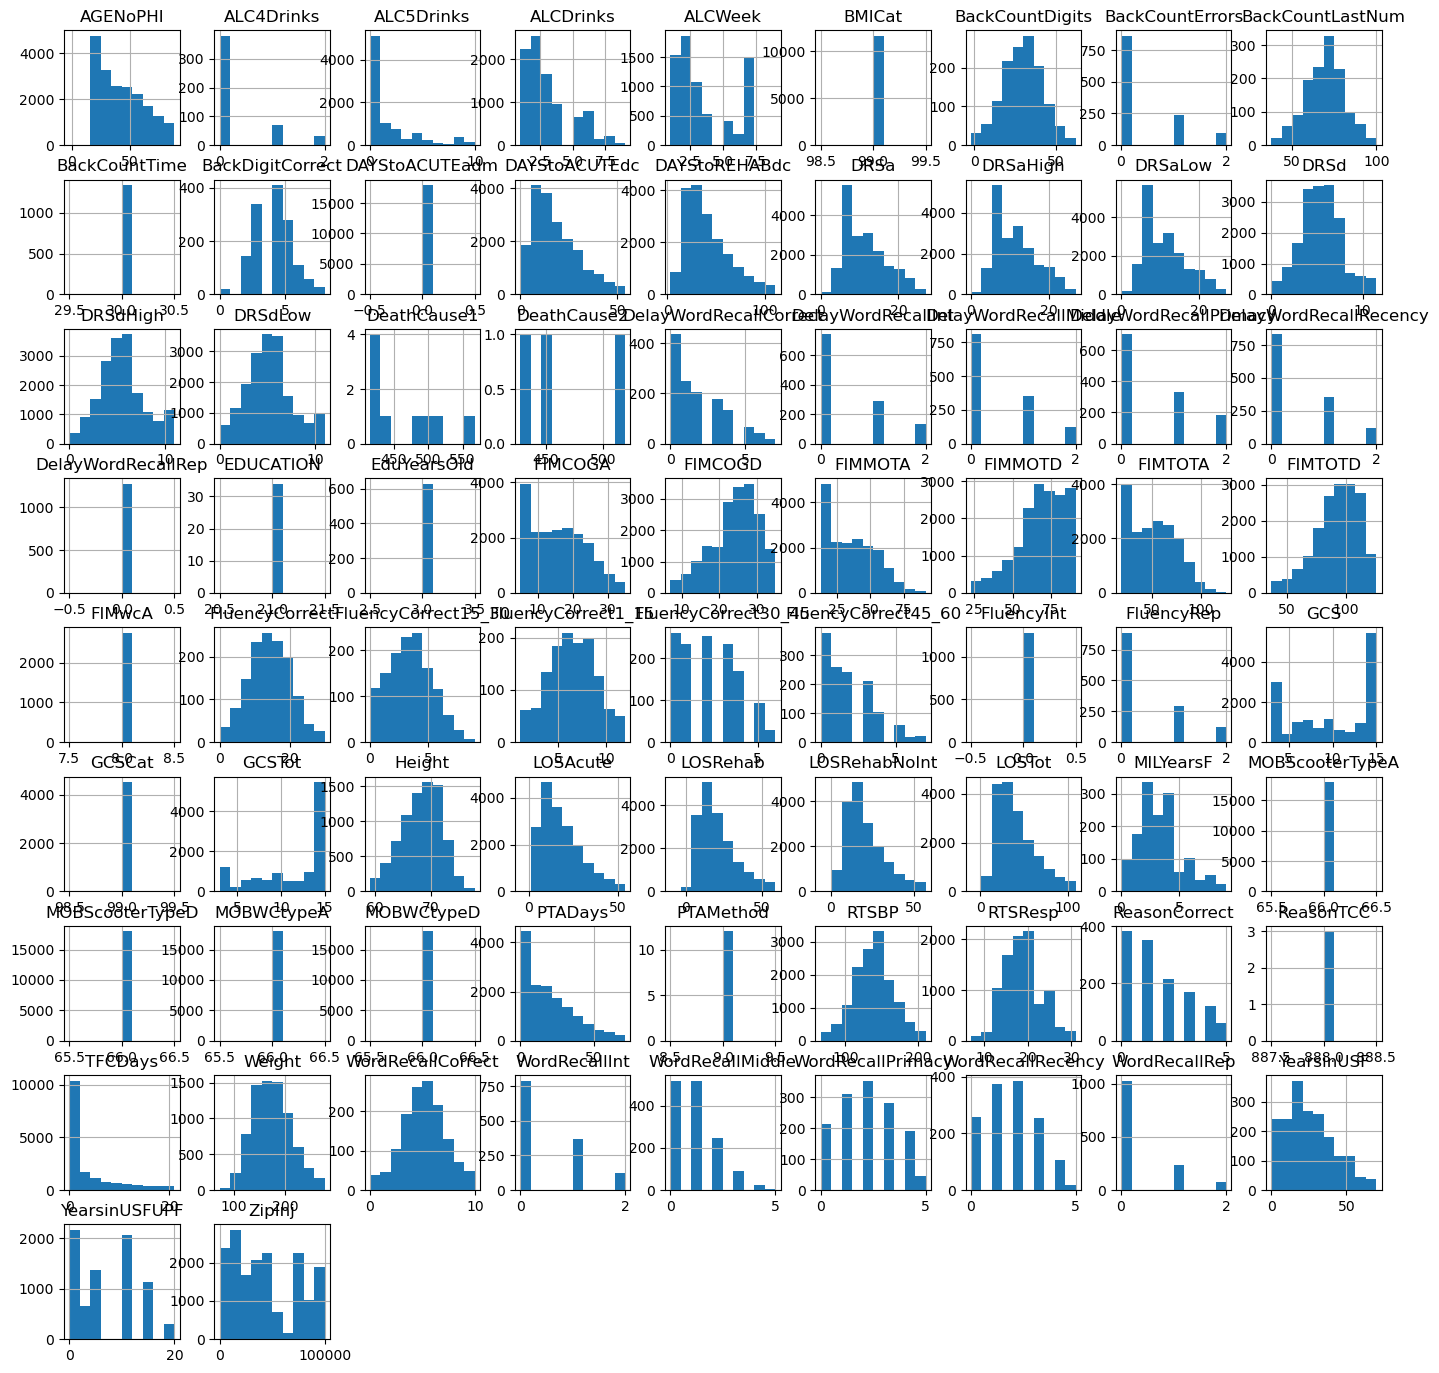

In [439]:
continuous_cols = summary[summary['all_categorical'] == False]['Variable']

# df_clean[continuous_cols].hist(figsize=(17,17))
# plt.suptitle("Histogram for continuous Variables")
# plt.subplots_adjust(hspace=1, wspace=0.3)

# plt.show()

# Compute IQR

data = df_decoded[continuous_cols]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds (you can adjust the multiplier)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Plot histogram
filtered_data.hist(figsize=(17,17))
plt.title("Histogram (Outliers Removed)")
plt.show()

In [440]:
df_decoded['FluencyInt'].value_counts()

FluencyInt
 0.0      1280
 1.0        75
 2.0        13
 3.0         5
 9.0         3
 8.0         2
 6.0         1
 30.0        1
 11.0        1
 14.0        1
-4.0         1
 890.0       1
Name: count, dtype: int64

In [441]:
#BMICat is clearly categorical and a code must have been missing. 99 seems frequently intrepreted as unknown
var_labels_dict["BMICat"]["99"] = 'Unknown'

#updated df_decoded ['BMICat_code_label']
#df_decoded.loc[df_decoded['BMICat'] == 99.0, 'BMICat_code_label'] = 'Unknown'

#DeathCause1 and DeathCause2 are categorical and use ICD-10-CM Codes which I left in
addit_cat_cols = ['DeathCause1', 'DeathCause2']

#the word recall task is ordered with a max count. can be encoded as categorical or continuous. 
word_recall_cat_cols = ['WordRecallCorrect',
                        'WordRecallMiddle',
                        'WordRecallPrimacy',
                        'WordRecallRecency',
                        'WordRecallRep',
                        'DelayWordRecallCorrect',
                        'DelayWordRecallInt',
                        'DelayWordRecallMiddle',
                        'DelayWordRecallPrimacy',
                        'DelayWordRecallRecency',
                        'DelayWordRecallRep']

#addit_cat_cols.append(word_recall_cat_cols)


#EduYearsOld has an unspecified, non-trivial (n=630) label 3 that we will interpolate as unknown (input error?)
var_labels_dict['EduYearsOld']['3'] = 'Unspecified Secondary Education (3)'
addit_cat_cols.append('EduYearsOld')


#FIMwcA has an unspecified, non-trivial (n=2755) label 8 that we will interpolate as unknown (input error?)
var_labels_dict['FIMwcA']['8'] = 'Unspecified Secondary Activity (8)'
addit_cat_cols.append('EduYearsOld')


#MOBScooterTypeA and MOBScooterTypeD have an additional code 66, usually corresponds to Variable did not exist
var_labels_dict['MOBScooterTypeA']['66'] = 'Variable did not exist'
var_labels_dict['MOBScooterTypeD']['66'] = 'Variable did not exist'

addit_cat_cols.append(['MOBScooterTypeA','MOBScooterTypeB'])

#MOBWCtypeA and MOBWCtypeD have an additional code 66, usually corresponds to Variable did not exist
var_labels_dict['MOBWCtypeA']['66'] = 'Variable did not exist'
var_labels_dict['MOBWCtypeD']['66'] = 'Variable did not exist'

addit_cat_cols.append(['MOBWCtypeA','MOBWCtypeD'])


#ReasonCorrect contains code 666.0, usually corresponds to Variable Did Not Exist
var_labels_dict['ReasonCorrect']['666'] = 'Variable did not exist'
addit_cat_cols.append('ReasonCorrect')

#ReasonTCC contains code 888.0, usually corresponds to Not Applicable
var_labels_dict['ReasonTCC']['888'] = 'Variable did not exist'
addit_cat_cols.append('ReasonTCC')

#update summary
# for col in addit_cat_cols:
#     summary.loc[summary['Variable'] == col, 'all_categorical'] = True

# #update categorical_cols/continuous_cols
# categorical_cols = summary[summary['all_categorical'] == True]['Variable']
# continuous_cols = summary[summary['all_categorical'] == False]['Variable']

In [444]:
df_decoded_clean, df_decoded_clean_summary = process_mixed_variables(df, var_labels_dict, replace_columns=True)

#there is an issue where some inputs don't match codes, either due to input errors or swapping 'code order' for 'code'
def swap_for_codes(tuples, df, column_name, var_labels_dict):
    """pass a list of tuples in the format [(wrong_code, code_key)], data frame, and column name to replace the values
        """
    for code in tuples:
        df.loc[df[column_name] == code[0], f'{column_name}_code_label'] = var_labels_dict[column_name][code[1]]
        df[column_name] = df[column_name].replace(code[0], np.nan)
    
    
#remove negative ages
df_decoded_clean['AGENoPHI'] = df_decoded_clean['AGENoPHI'].mask(df_decoded_clean['AGENoPHI'] <= 0.0)

#inputing ages as categories
bins = [11, 17, 24, 34, 44, 54, 64, 74, 84, 88, float('inf')]
labels = ['12–17', '18–24', '25–34', '35–44', '45–54', 
          '55–64', '65–74', '75–84', '85–88', '89+']

df_decoded_clean['AgeGroup'] = pd.cut(df_decoded_clean['AGENoPHI'].fillna(-1), bins=bins, labels=labels, right=True)

df_decoded_clean.loc[df_decoded_clean['AGENoPHI_code_label'] == '89 Years Old or Older', 'AgeGroup'] = '89+'

#BackCountTime is basically just over or under 30 seconds with the vast majority over 30 seconds
#create new binary column for BackCountTime_over_30, 1=True, 0=False
df_decoded_clean['BackCountTime_over_30'] = np.where(
    df_decoded_clean['BackCountTime'] >= 30, 1,
    np.where(df_decoded_clean['BackCountTime'].isna(), np.nan, 0))

df_decoded_clean.loc[df_decoded_clean['BackCountTime'] >= 30.0, 'BackCountTime_over_30'] = 1


#education is categorical. I'm going to assume '777' and '21' were input errors for '77' and '2' respectively.
edu = [(777.0, "77"), (21.0, "2")]
swap_for_codes(edu,df_decoded_clean,'EDUCATION',var_labels_dict)

df_decoded_clean_summary.loc[df_decoded_clean_summary['Variable'] == 'EDUCATION', 'all_categorical'] = True

#EduYearsOld has some code orders mixed in with the codes
edu_yo = [(3,'2.5')]
swap_for_codes(edu_yo, df_decoded_clean, 'EduYearsOld',var_labels_dict)
df_decoded_clean_summary.loc[df_decoded_clean_summary['Variable'] == 'EduYearsOld', 'all_categorical'] = True

#DeathCause1 and DeathCause2 are categorical and use ICD-10-CM Codes which I left in
DeathCause = ['DeathCause1', 'DeathCause2']
for col in DeathCause:
    df_decoded_clean[col] = df_decoded_clean[col].astype(str).str.zfill(5)
    df_decoded_clean_summary.loc[df_decoded_clean_summary['Variable'] == col, 'all_categorical'] = True

#FluencyInt has a few outliers 
df_decoded_clean['FluencyInt'] = df_decoded_clean['AGENoPHI'].mask((df_decoded_clean['FluencyInt'] <= 0.0) | (df_decoded_clean['FluencyInt'] > 100))

#GCSCat has some code orders mixed in with the codes
gcs = [(8.0, "77"), (99.0, "999")]
swap_for_codes(gcs, df_decoded_clean, 'GCSCat',var_labels_dict)
df_decoded_clean_summary.loc[df_decoded_clean_summary['Variable'] == 'GCSCat', 'all_categorical'] = True

#PTAMethod has an additional code 9, since there are so few I will drop these as an error
df_decoded_clean['PTAMethod'] = df_decoded_clean['PTAMethod'].mask(df_decoded_clean['PTAMethod'] == 9.0)

#ZipInj is just zip codes, convert these to strings
df_decoded_clean['ZipInj'] = df_decoded_clean['ZipInj'].astype(str).str.zfill(5)
df_decoded_clean_summary.loc[df_decoded_clean_summary['Variable'] == 'ZipInj', 'all_categorical'] = True

#update categorical_cols/continuous_cols
cat_cols = df_decoded_clean_summary[df_decoded_clean_summary['all_categorical'] == True]['Variable']
cont_cols = df_decoded_clean_summary[df_decoded_clean_summary['all_categorical'] == False]['Variable']

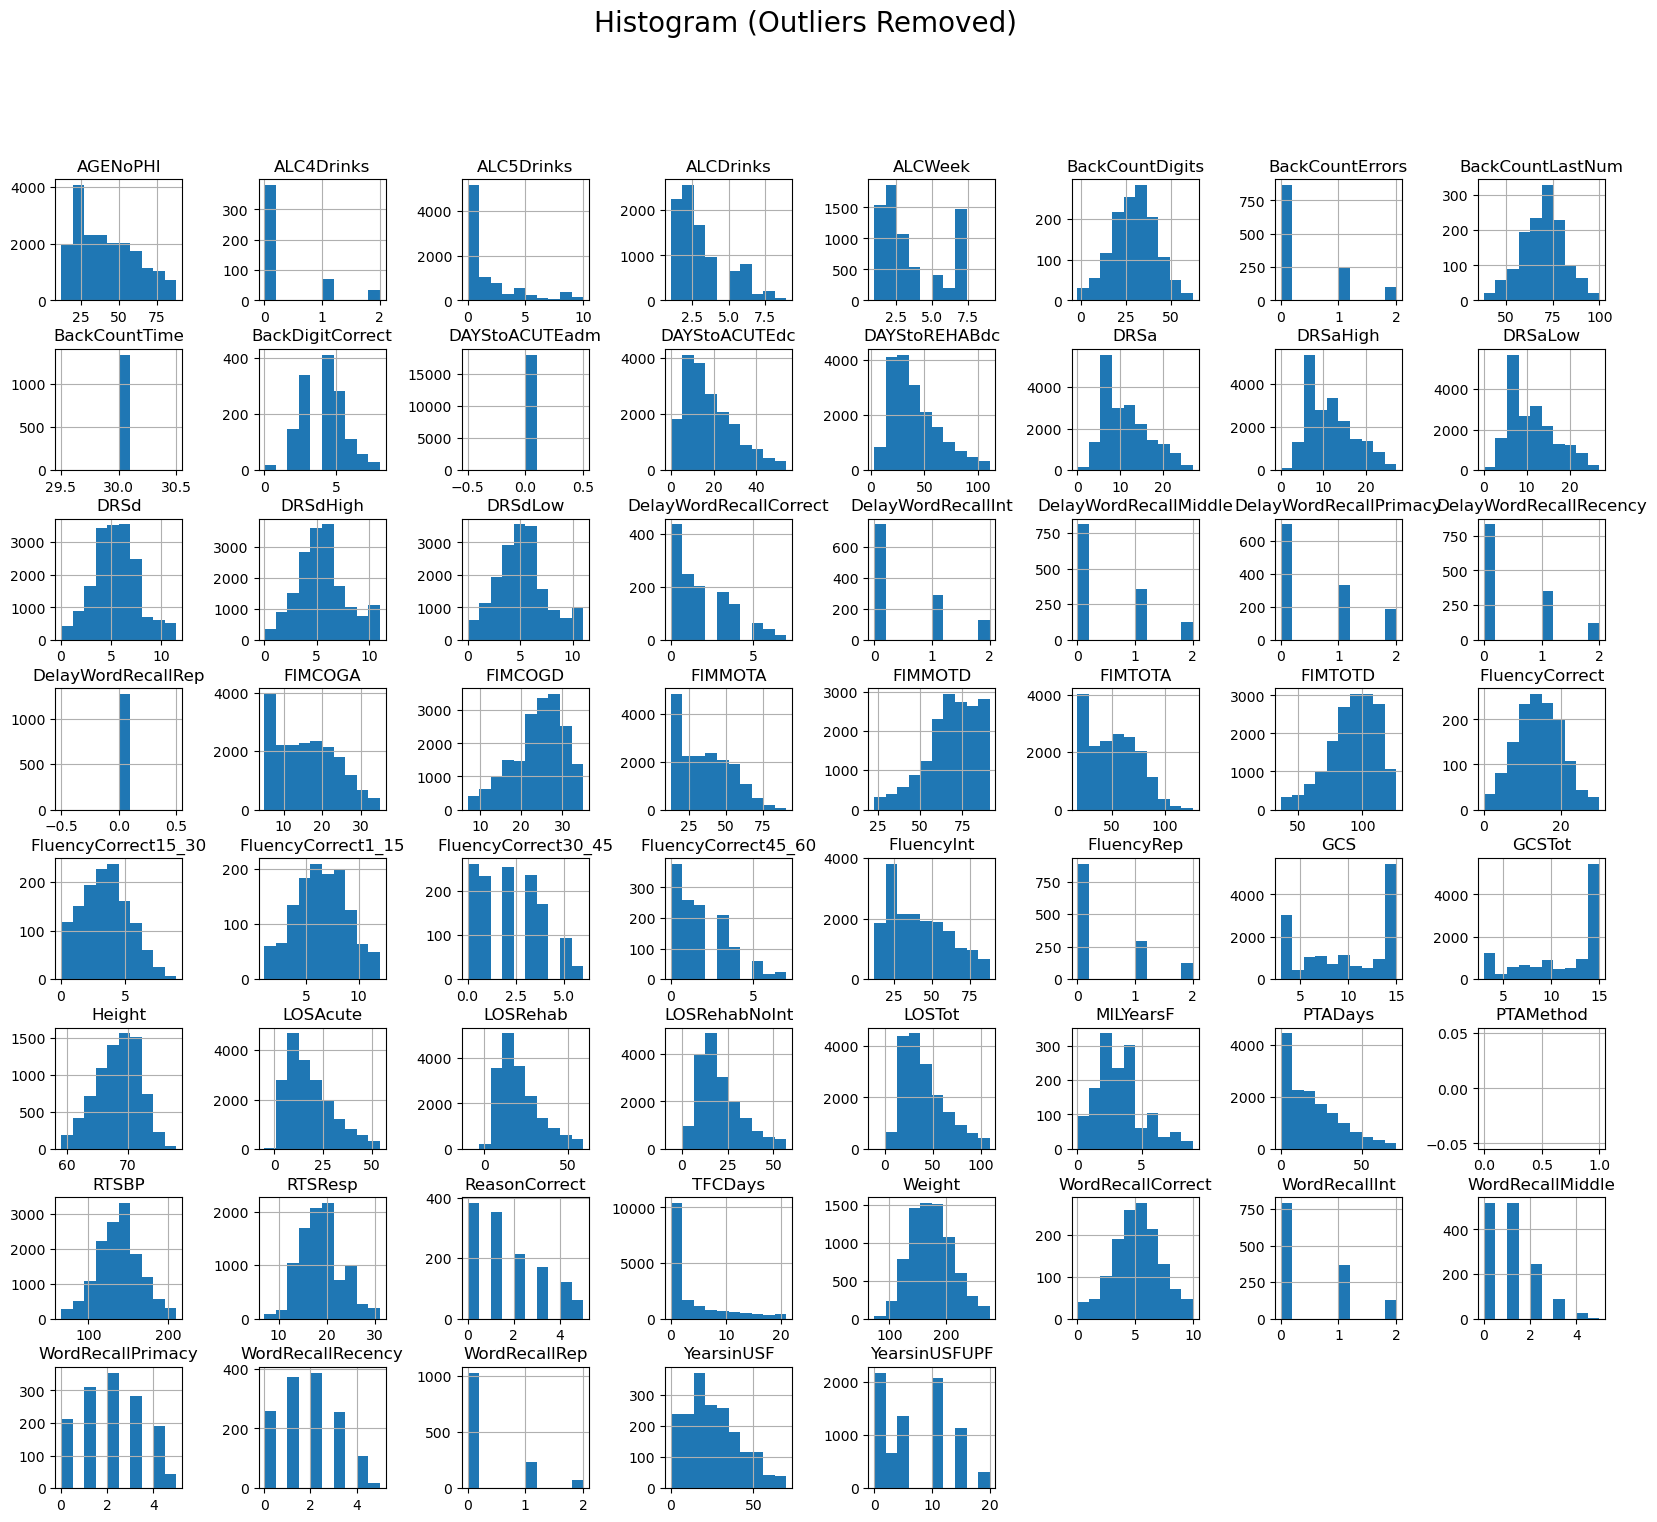

In [ ]:
cont_data = df_decoded_clean[cont_cols]

Q1 = cont_data.quantile(0.25)
Q3 = cont_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds (you can adjust the multiplier)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_cont_data = cont_data[(cont_data >= lower_bound) & (cont_data <= upper_bound)]

# Plot histogram
ax = filtered_cont_data.hist(figsize=(20, 17))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.6)

# Add a title to the whole figure (optional)
plt.suptitle("Histogram (Outliers Removed)", fontsize=20)

plt.show()

In [ ]:
cat_cols = df_decoded_clean_summary[df_decoded_clean_summary['all_categorical'] == True]['Variable']

cat_data = df[cat_cols]

# Create subplots
n_cols = 8  # you can change based on how many plots per row you want
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df_decoded_clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{col} Value Counts")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust spacing
plt.subplots_adjust(hspace=0.4, wspace=0.6)
plt.suptitle("Categorical Counts", fontsize=20)
plt.show()

In [470]:
cat_data

,AGENoPHI_code_label,ALC4Drinks_code_label,ALC5Drinks_code_label,ALCAnyDrink_code_label,ALCDrinks_code_label,ALCWeek_code_label,AcutePay1_code_label,AcutePay2_code_label,BMICat_code_label,BTACTAdm_code_label,...,WordRecallCorrect_code_label,WordRecallInt_code_label,WordRecallMiddle_code_label,WordRecallPrimacy_code_label,WordRecallRecency_code_label,WordRecallRep_code_label,WordRecallTCC_code_label,YearsinUSF_code_label,YearsinUSFUPF_code_label,ZipInj_code_label
0,NaN,NaN,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Self or Private Pay,Charity,Unknown,Variable Did Not Exist,...,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Not Applicable: Born in US,NaN,Variable Did Not Exist
1,NaN,NaN,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Medicaid,Not Applicable: No secondary payor,Unknown,Variable Did Not Exist,...,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,NaN,NaN,Variable Did Not Exist
2,NaN,NaN,Not Applicable,No,Not Applicable,Not Applicable,Medicaid,Not Applicable: No secondary payor,Unknown,Variable Did Not Exist,...,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,NaN,NaN,NaN
3,NaN,NaN,NaN,Yes,NaN,NaN,Medicare,Private Insurance,Normal,Variable Did Not Exist,...,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Not Applicable: Born in US,Not Applicable: Born in US,NaN
4,NaN,NaN,Not Applicable,No,Not Applicable,Not Applicable,Private Insurance,Medicare,Unknown,Variable Did Not Exist,...,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,Variable Did Not Exist,NaN,NaN,Variable Did Not Exist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19555,NaN,NaN,NaN,Yes,NaN,NaN,Private Insurance,Not Applicable: No secondary payor,Normal,Not Applicable: Battery not given,...,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Test Not Attempted (Not Consented Within Window),Not Applicable: Born in US,Not Applicable: Born in US,NaN
19556,NaN,Not Applicable,NaN,Yes,NaN,NaN,Private Insurance,Medicaid,Overweight,Not Applicable: Battery not given,...,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Test Not Attempted (Not Consented Within Window),Not Applicable: Born in US,Not Applicable: Born in US,NaN
19557,NaN,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Medicare,Not Applicable: No secondary payor,Normal,Not Applicable: Battery not given,...,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Test Not Attempted (Not Consented Within Window),Not Applicable: Born in US,Not Applicable: Born in US,NaN
19558,NaN,Not Applicable,NaN,Yes,NaN,NaN,Private Insurance,Not Applicable: No secondary payor,Normal,Not Applicable: Battery not given,...,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Not Tested,Test Not Attempted (Not Consented Within Window),Not Applicable: Born in US,Not Applicable: Born in US,NaN
